# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




,x,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2569748,0.06603605,0.016969601,0.0043607599,1.120605e-03,2.879674e-04,7.400036e-05,1.901623e-05,4.886691e-06,1.255757e-06,2.0969374
2,-1.4682212,2.15567342,-3.165005372,4.6469279115,-6.822718e+00,1.001726e+01,-1.470755e+01,2.159394e+01,-3.170468e+01,4.654948e+01,-2.3690911
3,0.4807922,0.23116110,0.111140445,0.0534354545,2.569135e-02,1.235220e-02,5.938840e-03,2.855348e-03,1.372829e-03,6.600453e-04,2.2116888
4,-1.0887965,1.18547771,-1.290743922,1.4053574007,-1.530148e+00,1.666020e+00,-1.813957e+00,1.975029e+00,-2.150405e+00,2.341353e+00,0.4301609
5,-0.5576923,0.31102070,-0.173453849,0.0967338759,-5.394774e-02,3.008624e-02,-1.677886e-02,9.357443e-03,-5.218574e-03,2.910358e-03,3.1640485
6,-0.1199601,0.01439042,-0.001726276,0.0002070843,-2.484185e-05,2.980030e-06,-3.574847e-07,4.288390e-08,-5.144356e-09,6.171174e-10,0.5518585


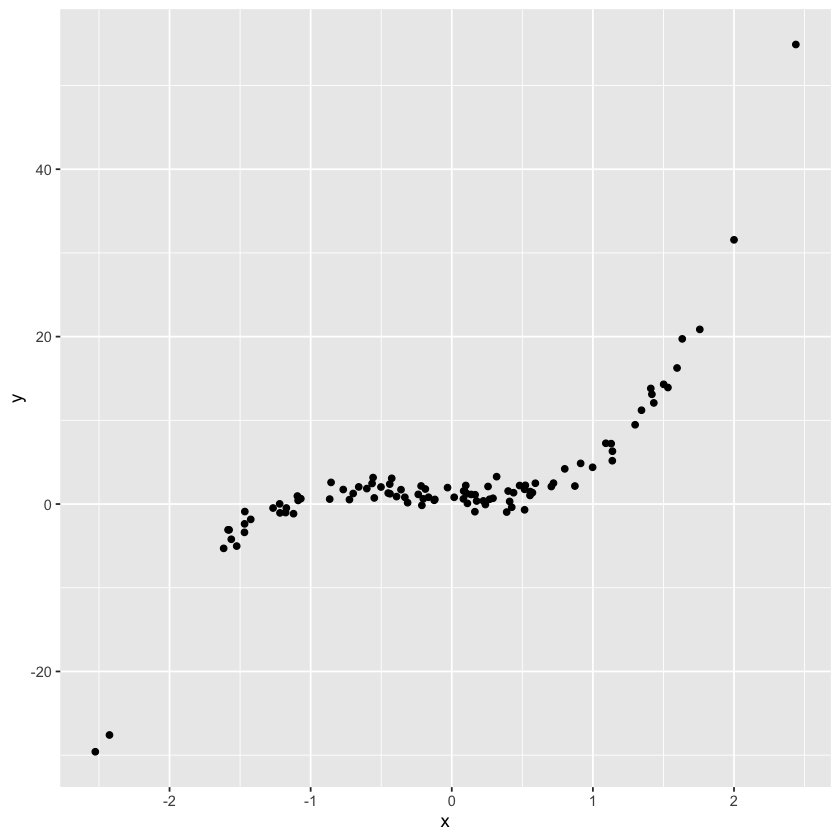

In [1]:
# WRITE YOUR CODE HERE
library(tidyverse)
library(lme4)

beta_0 <- 1
beta_1 <- -1
beta_2 <- 2
beta_3 <- 3
sd_x <- 1
sd_noise <- 1
sample_size <- 100
mean_noise <- 0 #normally distributed around 0
mean_x <- 0 #arbitrary choice

#Simulate the data
simulate_data <- function(sample_size, beta_0, beta_1, beta_2, beta_3, sd_noise, sd_x, mean_noise) {
  
  x <- rnorm(sample_size, mean_x, sd_x) #generate random numbers, length of vector is the sample size, intake mean and variance
  
  noise <- rnorm(sample_size, mean_noise, sd_noise)
  
  y <- beta_0 + beta_1*x + beta_2*x^2 + beta_3*x^3 + noise
  
  return(data.frame(x, x^2, x^3, x^4, x^5, x^6, x^7, x^8, x^9, x^10, y))
}

dat <- simulate_data(sample_size, beta_0, beta_1, beta_2, beta_3, sd_noise, sd_x, mean_noise)
head(dat)

ggplot(data = dat, (aes(x, y))) +
  geom_point()


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [3]:
# WRITE YOUR CODE HERE
install.packages("leaps")  
library(leaps)

regfit.full = regsubsets(y~., data = dat)
summary(regfit.full)
#Best model with only 1 predictor is x^3. Best model with 2 predictors is x^2, x^3, etc.

reg.summary <- summary(regfit.full)



The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//RtmpREY98R/downloaded_packages


Subset selection object
Call: regsubsets.formula(y ~ ., data = dat)
10 Variables  (and intercept)
     Forced in Forced out
x        FALSE      FALSE
x.2      FALSE      FALSE
x.3      FALSE      FALSE
x.4      FALSE      FALSE
x.5      FALSE      FALSE
x.6      FALSE      FALSE
x.7      FALSE      FALSE
x.8      FALSE      FALSE
x.9      FALSE      FALSE
x.10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         x   x.2 x.3 x.4 x.5 x.6 x.7 x.8 x.9 x.10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 ) "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 ) "*" "*" "*" " " " " " " " " " " " " "*" 
5  ( 1 ) "*" "*" "*" " " " " " " " " "*" " " "*" 
6  ( 1 ) "*" "*" "*" " " "*" " " "*" " " "*" " " 
7  ( 1 ) "*" "*" "*" "*" "*" " " "*" " " "*" " " 
8  ( 1 ) "*" "*" "*" "*" "*" "*" "*" " " "*" " " 

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

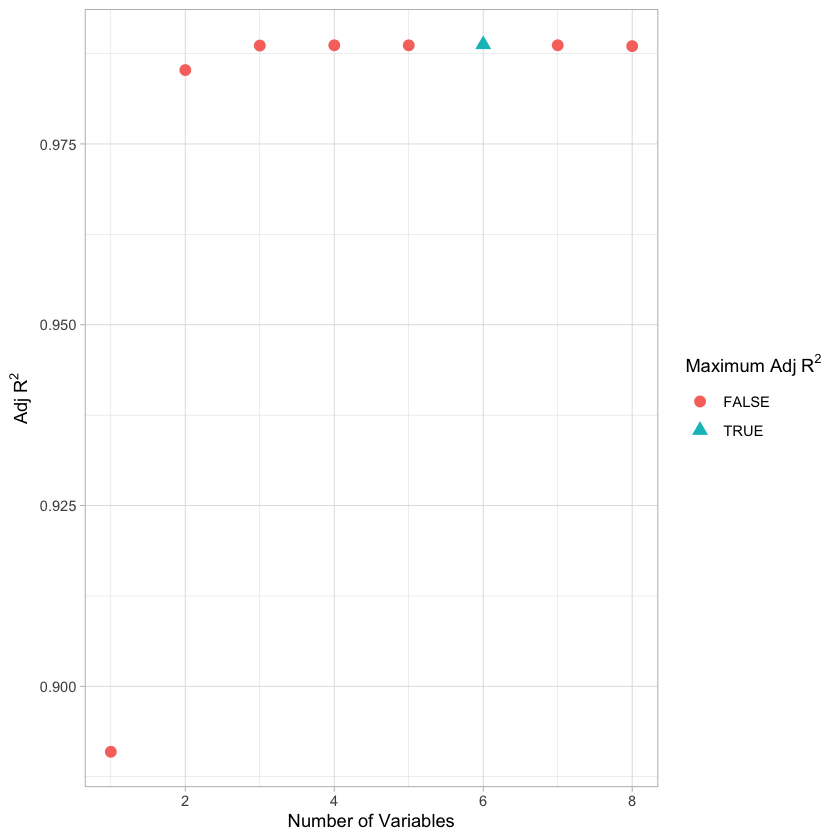

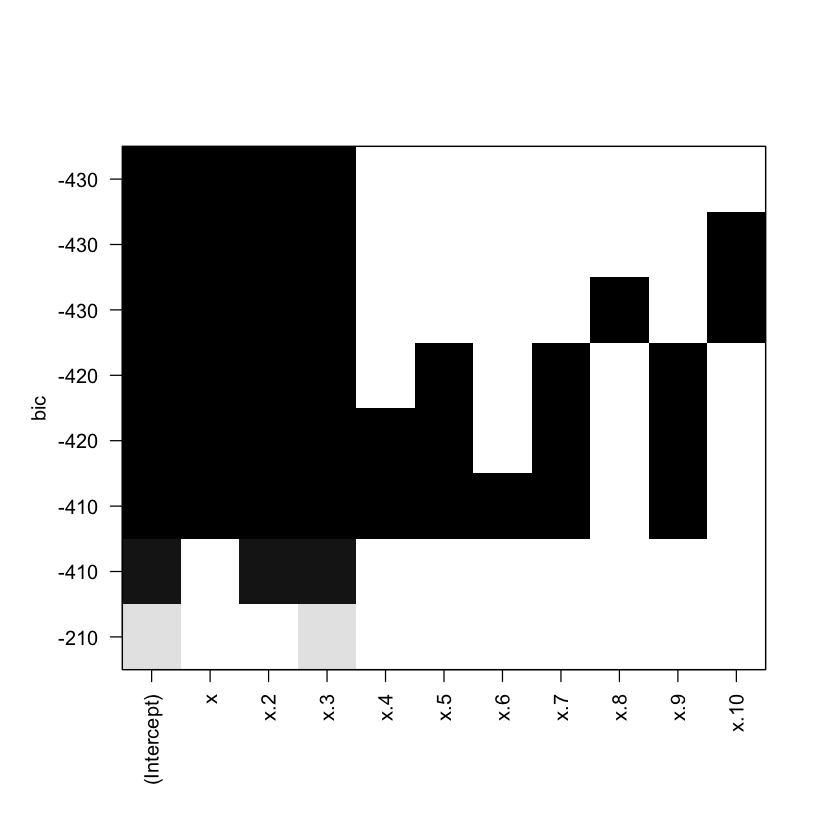

[1] 3

[1] 6

[1] 3

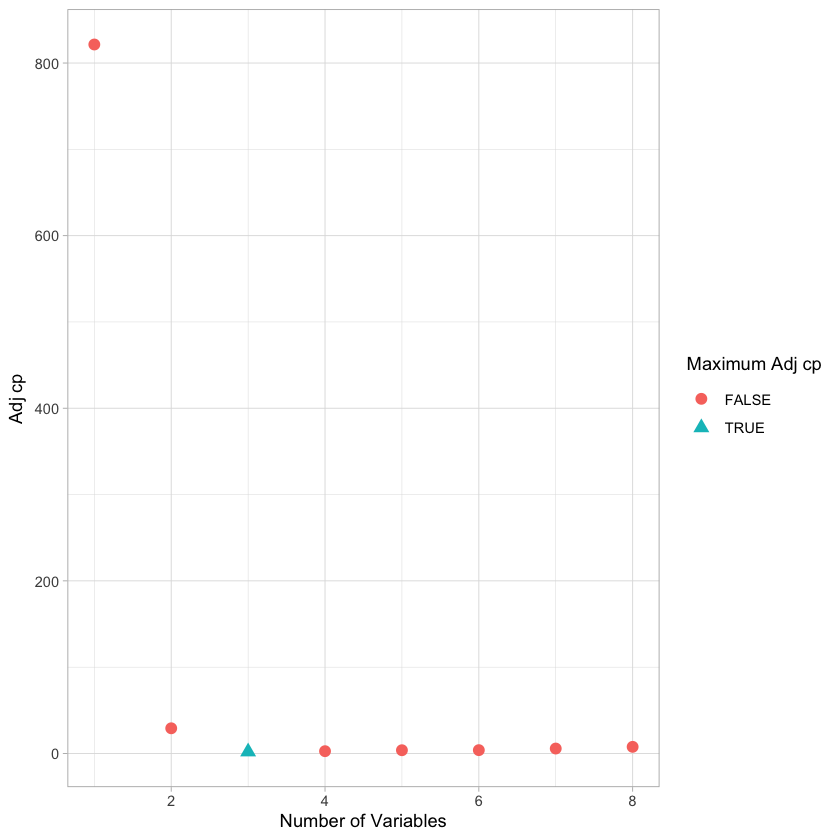

In [6]:

#R2
numvar = 1:length(reg.summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))

# See what is included in the summary object
attributes(reg.summary)

adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#BIC
plot(regfit.full, scale="bic")

#CP
numvar = 1:length(reg.summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))

cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, maxcp <- allfalse)
cp.df$maxcp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=maxcp,col=maxcp)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~cp, color='Maximum Adj'~cp, shape='Maximum Adj'~cp)


#Identify the best fit models of per each score (R2, BIC, CP)

which.min(reg.summary$bic) #BIC is best fit w 3 predictors
which.max(reg.summary$adjr2) #r2 is best w 7 predictors
which.min(reg.summary$cp) #cp is best w 3 predictors



Per R^2, the 7 predictor model is best; per BIC and CP, the 3 predictor model is best.

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., data = dat, nvmax = 10, method = "forward")
10 Variables  (and intercept)
     Forced in Forced out
x        FALSE      FALSE
x.2      FALSE      FALSE
x.3      FALSE      FALSE
x.4      FALSE      FALSE
x.5      FALSE      FALSE
x.6      FALSE      FALSE
x.7      FALSE      FALSE
x.8      FALSE      FALSE
x.9      FALSE      FALSE
x.10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          x   x.2 x.3 x.4 x.5 x.6 x.7 x.8 x.9 x.10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" " " " " " " " " " " " " "*" 
5  ( 1 )  "*" "*" "*" " " " " " " " " "*" " " "*" 
6  ( 1 )  "*" "*" "*" " " " " "*" " " "*" " " "*" 
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*" 
8  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" "*" "*" 
9  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" "*" "*" 
10  ( 1 ) "*"

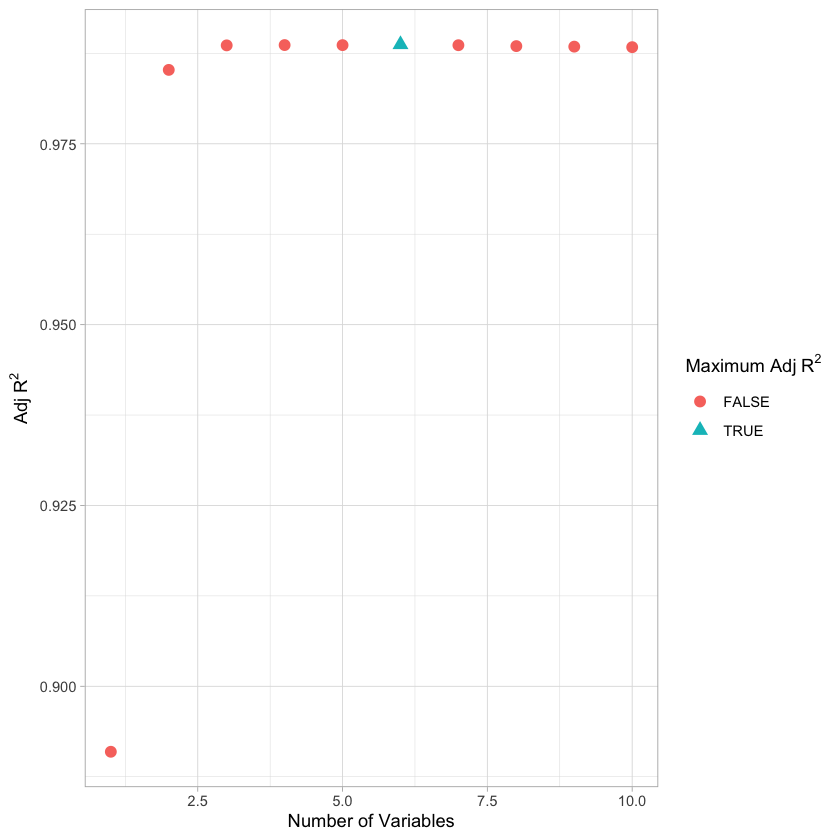

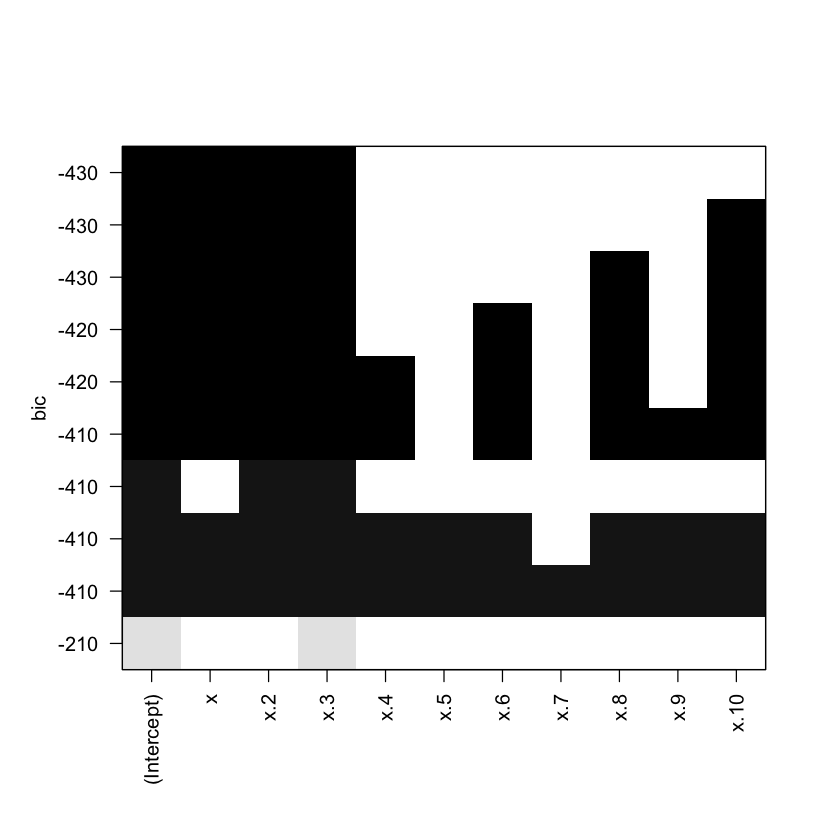

[1] 3

[1] 6

[1] 3

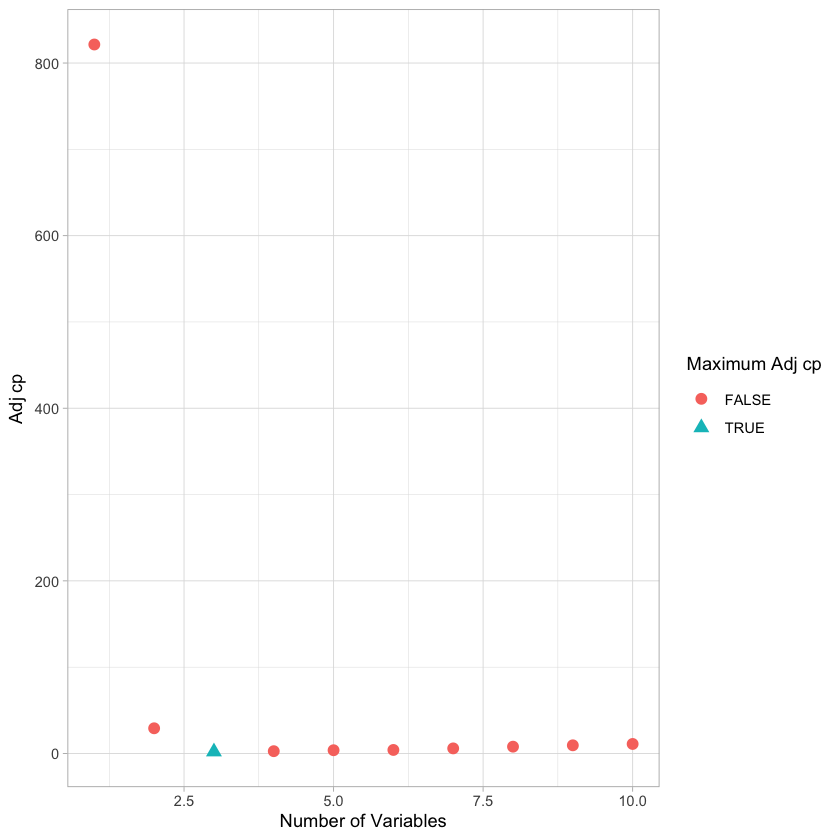

In [8]:
library(MASS)

#Forward stepwise model selection
regfit_fwd <- regsubsets(y~., data = dat, nvmax = 10, method = "forward")
summary(regfit_fwd)

regfit_fwd.summary <- summary(regfit_fwd)

##Plot R2, BIC, CP for each model tested.

#R2
numvar = 1:length(regfit_fwd.summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(regfit_fwd.summary$rss))

adjr2.df <- data.frame(numvar = numvar, adjr2 <- regfit_fwd.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfit_fwd.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#BIC
plot(regfit_fwd, scale="bic")

#CP
numvar = 1:length(regfit_fwd.summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(regfit_fwd.summary$rss))

cp.df <- data.frame(numvar = numvar, cp <- regfit_fwd.summary$cp, maxcp <- allfalse)
cp.df$maxcp[which.min(regfit_fwd.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=maxcp,col=maxcp)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~cp, color='Maximum Adj'~cp, shape='Maximum Adj'~cp)


#Coefficients of best model in forward stepwise selection:
which.min(regfit_fwd.summary$bic) #BIC is best w 3 predictors
which.max(regfit_fwd.summary$adjr2) #R2 is best w 10 predictors
which.min(regfit_fwd.summary$cp) #CP is best w 3 predictors



In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., data = dat, nvmax = 10, method = "backward")
10 Variables  (and intercept)
     Forced in Forced out
x        FALSE      FALSE
x.2      FALSE      FALSE
x.3      FALSE      FALSE
x.4      FALSE      FALSE
x.5      FALSE      FALSE
x.6      FALSE      FALSE
x.7      FALSE      FALSE
x.8      FALSE      FALSE
x.9      FALSE      FALSE
x.10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          x   x.2 x.3 x.4 x.5 x.6 x.7 x.8 x.9 x.10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" " " " " " " " " " " "*" " " 
5  ( 1 )  "*" "*" "*" " " " " " " "*" " " "*" " " 
6  ( 1 )  "*" "*" "*" " " "*" " " "*" " " "*" " " 
7  ( 1 )  "*" "*" "*" " " "*" " " "*" " " "*" "*" 
8  ( 1 )  "*" "*" "*" " " "*" " " "*" "*" "*" "*" 
9  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" "*" "*" 
10  ( 1 ) "

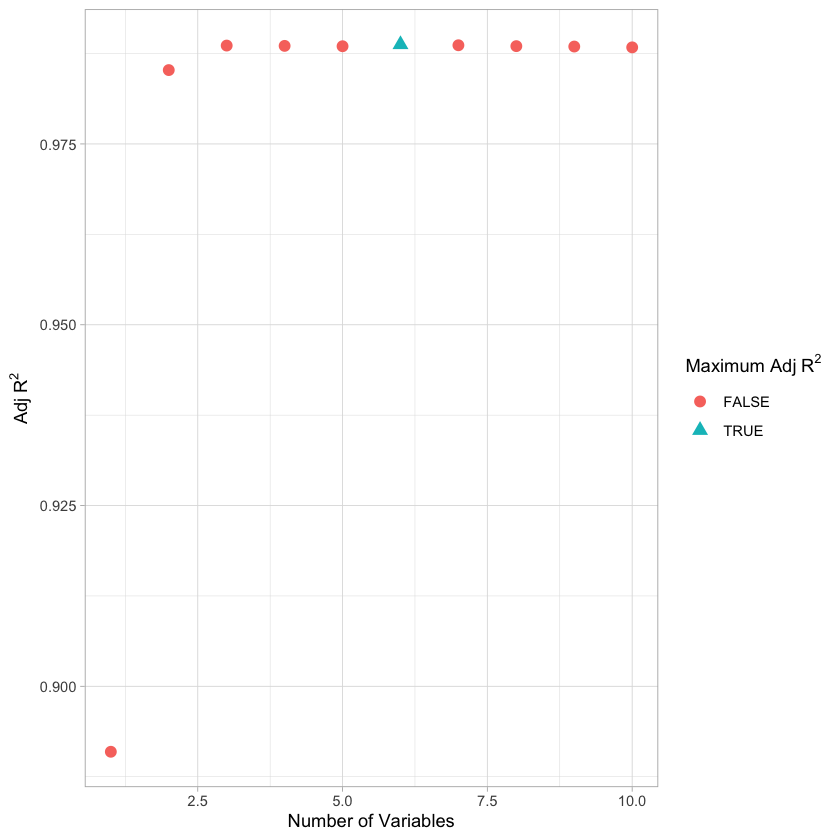

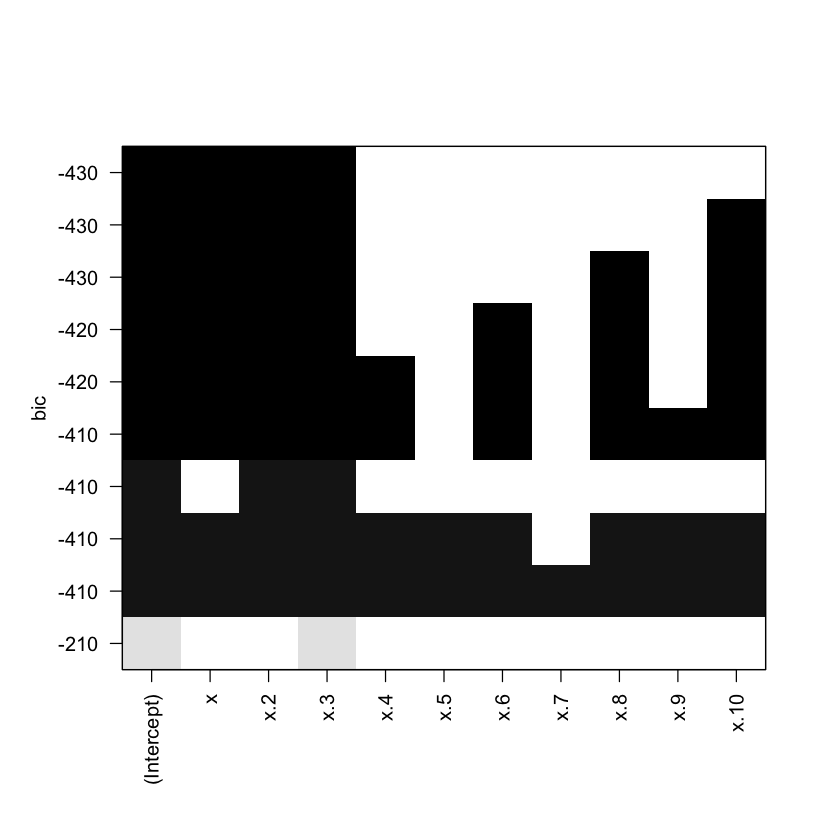

[1] 3

[1] 6

[1] 3

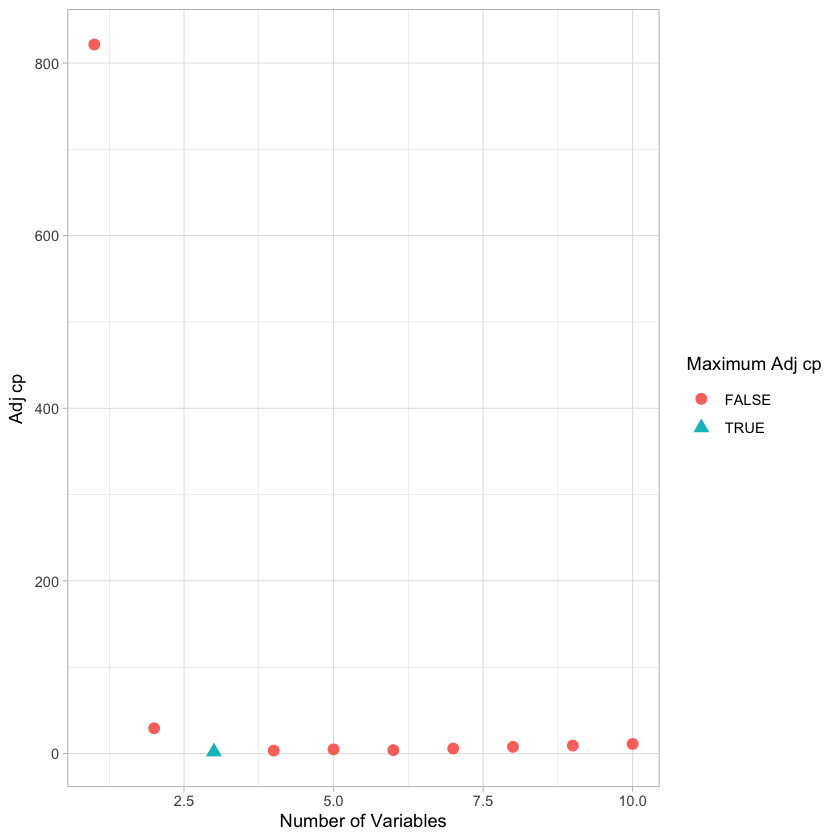

In [9]:
# WRITE YOUR CODE HERE
#Backward stepwise model selection

regfit_bwd <- regsubsets(y~., data = dat, nvmax = 10, method = "backward")
summary(regfit_bwd)

regfit_bwd.summary <- summary(regfit_bwd)

##Plot R2, BIC, CP for each model tested.
#R2
numvar = 1:length(regfit_bwd.summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(regfit_bwd.summary$rss))

adjr2.df <- data.frame(numvar = numvar, adjr2 <- regfit_bwd.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfit_bwd.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#BIC
plot(regfit_fwd, scale="bic")

#CP
numvar = 1:length(regfit_bwd.summary$rss) # Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(regfit_bwd.summary$rss))

cp.df <- data.frame(numvar = numvar, cp <- regfit_bwd.summary$cp, maxcp <- allfalse)
cp.df$maxcp[which.min(regfit_bwd.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=maxcp,col=maxcp)) + 
  geom_point(size=3) + theme_light() + 
  labs(x = "Number of Variables", y = 'Adj'~cp, color='Maximum Adj'~cp, shape='Maximum Adj'~cp)



#In backward stepwise selection, start with full model, then subtract least impactful variable, etc.
#Coefficients of best model in backward stepwise selection:
which.min(regfit_bwd.summary$bic) #BIC is best w 3 predictors
which.max(regfit_bwd.summary$adjr2) #R2 is best w 7 predictors
which.min(regfit_bwd.summary$cp) #CP is best w 3 predictors


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

Backward stepwise selection yielded the same best-fit models as did the best subset selection method.  However, forward stepwise selection's R^2 best-fit model has a different number of predictor variables (10 rather than 7).

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [10]:
# WRITE YOUR CODE HERE
sample_size <- 1000
mean_x <- 1
sd_x <- 0.5
mean_noise <- 0
sd_noise <- 1

simulate_data_3 <- function(sample_size, mean_x, sd_x, sd_noise, mean_noise) {
  
  x1 <- rnorm(sample_size, mean_x, sd_x)
  x2 <- rnorm(sample_size, mean_x, sd_x)
  x3 <- rnorm(sample_size, mean_x, sd_x)
  x4 <- rnorm(sample_size, mean_x, sd_x)
  x5 <- rnorm(sample_size, mean_x, sd_x)
  x6 <- rnorm(sample_size, mean_x, sd_x)
  x7 <- rnorm(sample_size, mean_x, sd_x)
  x8 <- rnorm(sample_size, mean_x, sd_x)
  x9 <- rnorm(sample_size, mean_x, sd_x)
  x10 <- rnorm(sample_size, mean_x, sd_x)
  x11 <- rnorm(sample_size, mean_x, sd_x)
  x12 <- rnorm(sample_size, mean_x, sd_x)
  x13 <- rnorm(sample_size, mean_x, sd_x)
  x14 <- rnorm(sample_size, mean_x, sd_x)
  x15 <- rnorm(sample_size, mean_x, sd_x)
  x16 <- rnorm(sample_size, mean_x, sd_x)
  x17 <- rnorm(sample_size, mean_x, sd_x)
  x18 <- rnorm(sample_size, mean_x, sd_x)
  x19 <- rnorm(sample_size, mean_x, sd_x)
  x20 <- rnorm(sample_size, mean_x, sd_x)
  
  beta <- runif(20, -2, 2)
  beta <- beta*rbinom(20,1,0.5) #20 numbers generated, result is 0 or 1, 50% chance of each
  
  noise <- rnorm(sample_size, mean_noise, sd_noise)
  
  y <-  beta[1]*x1 + beta[2]*x2 + beta[3]*x3 + beta[4]*x4 + beta[5]*x5 + beta[6]*x6 + beta[7]*x7 + beta[8]*x8 + beta[9]*x9 + beta[10]*x10 + beta[11]*x11 + beta[12]*x12 + beta[13]*x13 + beta[14]*x14 + beta[15]*x15 + beta[16]*x16 + beta[17]*x17 + beta[18]*x18 + beta[19]*x19 + beta[20]*x20 + noise
  

  
  return(data.frame(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14,
                    x15, x16, x17, x18, x19, x20, y))
}

simulated_data_3 <- simulate_data_3(sample_size, mean_x, sd_x, sd_noise, mean_noise)
head(simulated_data_3)

training_set <- simulated_data_3[1:100,]

test_set <- simulated_data_3[101:1000,]


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.4112523,1.4103076,1.2918043,1.1721737,0.7172778,0.4977004,0.4428167,0.2944909,0.5525299,0.2349784,⋯,-0.07753262,1.1612317,1.1262258,1.1625597,1.6366579,1.3576279,0.04354752,1.14169775,0.53186363,-2.433876
2,0.9212074,1.4327241,0.8733345,1.0516512,1.3639815,1.0481065,0.7606151,0.5352333,1.2427143,1.6913169,⋯,0.81533526,0.6089863,1.5739043,1.6661710,1.2872238,0.5611880,1.16747279,1.51576360,0.61676046,-4.886740
3,1.0550508,1.5977657,0.6246011,1.0591880,0.5162997,2.0824137,0.8214054,1.3127540,0.7611818,0.4262897,⋯,1.19077973,1.2835455,0.8129110,1.0281535,0.6181315,0.4068230,1.73433263,0.08667872,0.46868041,-6.055548
4,2.3683716,1.0168842,1.5664886,0.4643193,0.8018902,0.5707156,1.0007888,1.1592204,1.2128784,1.2622232,⋯,1.36346233,1.0063657,0.9694137,0.8934747,0.4383653,0.9965126,0.64562400,1.39829935,-0.06800113,-4.175481
5,1.1381859,1.1753027,1.1232042,1.3723153,0.8717417,1.0806704,0.9160480,1.4314819,0.6671502,0.5261124,⋯,0.51484388,1.4968254,1.2606173,2.0209311,0.8956244,1.3283432,0.86888165,0.18571653,0.92574365,-4.962272
6,1.2380167,0.6826537,0.8688544,0.7479491,1.2406280,1.3332144,1.4932210,1.1088017,1.0634578,0.5219392,⋯,0.92213017,-0.1202337,1.3739543,0.7507689,0.9204939,0.9258742,0.32510388,1.18552454,0.78559492,-8.145755


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(y ~ ., data = training_set, nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  " " " " " " " " " " " " " " "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " " " " " "*" " " "*" " " " " " " " " " " " " " " " " " "
3  ( 1 )  " " " " " " " " " " "*" " " "*" " " " " " " " " 

 [1] 3.388982 2.506977 1.586261 1.169209 1.094723 1.044236 1.077190 1.089382
 [9] 1.108421 1.121713 1.124052 1.126846 1.132000 1.142600 1.136004 1.145144
[17] 1.138871 1.139480 1.145331 1.144162


1          2          3          4          5          6          7 
 -3.063531  -4.524403  -6.406899  -3.834962  -5.229062  -6.761894  -3.632150 
         8          9         10         11         12         13         14 
 -7.320104  -8.890206  -6.501004  -5.924649  -4.614960  -2.379176  -8.214335 
        15         16         17         18         19         20         21 
 -7.863654  -6.793009  -2.454769  -7.697415  -9.388491  -7.592363  -8.083367 
        22         23         24         25         26         27         28 
 -2.997379  -7.757176  -7.319878  -6.100499  -6.524999  -7.359741  -7.773374 
        29         30         31         32         33         34         35 
 -3.554604  -8.177166  -3.181667  -5.493040  -3.057544  -3.681627  -5.339343 
        36         37         38         39         40         41         42 
 -8.583938  -5.903906  -3.237854  -6.351288  -8.046798  -4.334013  -5.778486 
        43         44         45         46         47         48         49 
 -4.111359  -6.007966  -6.424343  -5.534659  -9.940110  -7.016669  -4.835231 
        50         51         52         53         54         55         56 
 -6.107893  -7.833749  -2.031452  -6.008211  -8.750894  -6.476749  -4.729678 
        57         58         59         60         61         62         63 
 -6.473448  -5.783691  -3.907625  -6.902269  -7.962553  -4.882613  -5.835460 
        64         65         66         67         68         69         70 
 -7.936731  -6.718694  -7.571291 -11.071041  -5.618725  -3.170361  -7.039147 
        71         72         73         74         75         76         77 
 -7.155074  -4.701249  -4.229017  -3.912293  -7.765673  -4.925168  -4.761161 
        78         79         80         81         82         83         84 
 -8.415903  -6.184973  -2.620990  -4.021753  -5.982936  -5.851331  -9.541180 
        85         86         87         88         89         90         91 
 -5.851686  -7.904541  -3.211348  -8.113690  -9.612756  -7.492198  -8.168954 
        92         93         94         95         96         97         98 
 -9.278592  -6.132889  -5.603957  -8.294358  -4.823478  -8.239482  -6.620479 
        99        100 
 -6.782701  -6.054293

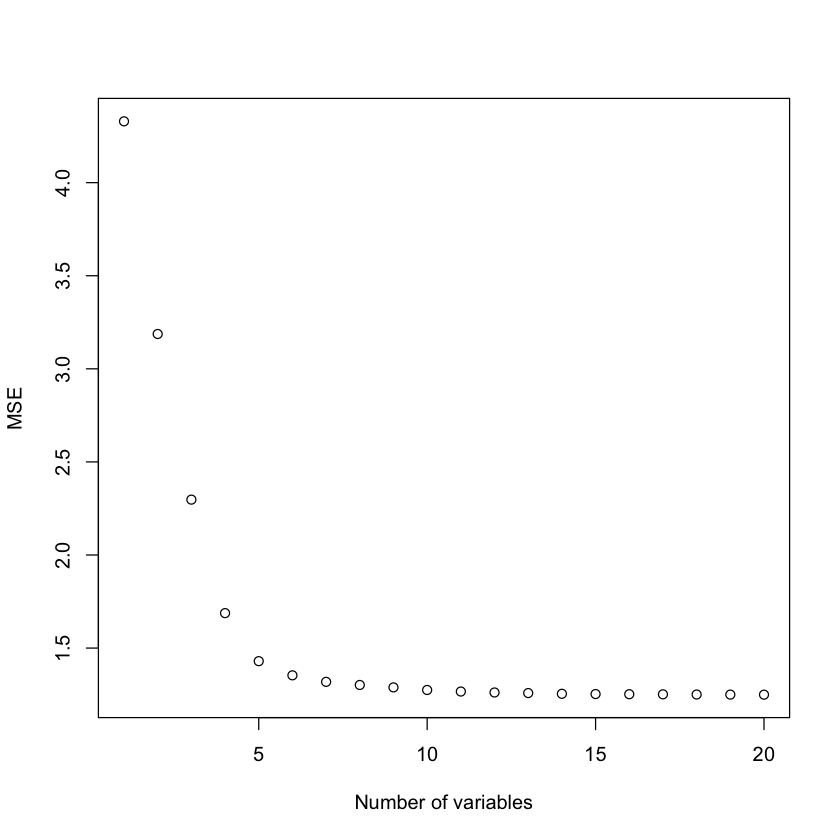

In [11]:
#Training Set
regfit.full = regsubsets(y~., data = training_set, nvmax = 20)

training_summary <- summary(regfit.full)

training_summary

#MSE = RSS / (sample size - (num of predictors + intercept)
plot((training_summary$rss/79), xlab = "Number of variables", ylab = "MSE")

#Need to identify the coefficient B for each of the 20 models identified in 
# regfit.full to find the test set MSE.

#First make a matrix with all test set data.
test_mat = model.matrix (y~., data = test_set)

#Define var val_errors, empaty vector of NAs. The MSEs will go in this column.
val_errors <- rep(NA,20)

for(i in 1:20){
  
  # Extract the vector of predictors in the best fit model on i predictors
  coefi = coef(regfit.full, id = i)
  
  # Make predictions using matrix multiplication of the test matirx and the coefficients vector
  pred = test_mat[,names(coefi)]%*%coefi
  
  # Calculate the MSE
  val_errors[i] = mean((test_set$y-pred)^2)
}

print(val_errors)

predict(lm(y~., data = training_set))

mse_training <- mean(training_set$y - predict(lm(y~., data = training_set))^2)


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

Subset selection object
Call: regsubsets.formula(y ~ ., data = test_set, nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  " " " " " " " " " " "*" " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " " " " " "*" " " " " " " " " " " " " " " " " " " " " " "
3  ( 1 )  " " " " " " " " " " "*" " " "*" " " " " " " " " " " 

 [1] 3.2899181 2.3222867 1.5457258 1.1292817 1.0412070 0.9862613 0.9661879
 [8] 0.9628159 0.9616176 0.9608886 0.9603474 0.9598053 0.9593865 0.9589893
[15] 0.9587863 0.9587369 0.9586877 0.9586490 0.9586379 0.9586376


1          2          3          4          5          6          7 
 -3.063531  -4.524403  -6.406899  -3.834962  -5.229062  -6.761894  -3.632150 
         8          9         10         11         12         13         14 
 -7.320104  -8.890206  -6.501004  -5.924649  -4.614960  -2.379176  -8.214335 
        15         16         17         18         19         20         21 
 -7.863654  -6.793009  -2.454769  -7.697415  -9.388491  -7.592363  -8.083367 
        22         23         24         25         26         27         28 
 -2.997379  -7.757176  -7.319878  -6.100499  -6.524999  -7.359741  -7.773374 
        29         30         31         32         33         34         35 
 -3.554604  -8.177166  -3.181667  -5.493040  -3.057544  -3.681627  -5.339343 
        36         37         38         39         40         41         42 
 -8.583938  -5.903906  -3.237854  -6.351288  -8.046798  -4.334013  -5.778486 
        43         44         45         46         47         48         49 
 -4.111359  -6.007966  -6.424343  -5.534659  -9.940110  -7.016669  -4.835231 
        50         51         52         53         54         55         56 
 -6.107893  -7.833749  -2.031452  -6.008211  -8.750894  -6.476749  -4.729678 
        57         58         59         60         61         62         63 
 -6.473448  -5.783691  -3.907625  -6.902269  -7.962553  -4.882613  -5.835460 
        64         65         66         67         68         69         70 
 -7.936731  -6.718694  -7.571291 -11.071041  -5.618725  -3.170361  -7.039147 
        71         72         73         74         75         76         77 
 -7.155074  -4.701249  -4.229017  -3.912293  -7.765673  -4.925168  -4.761161 
        78         79         80         81         82         83         84 
 -8.415903  -6.184973  -2.620990  -4.021753  -5.982936  -5.851331  -9.541180 
        85         86         87         88         89         90         91 
 -5.851686  -7.904541  -3.211348  -8.113690  -9.612756  -7.492198  -8.168954 
        92         93         94         95         96         97         98 
 -9.278592  -6.132889  -5.603957  -8.294358  -4.823478  -8.239482  -6.620479 
        99        100 
 -6.782701  -6.054293

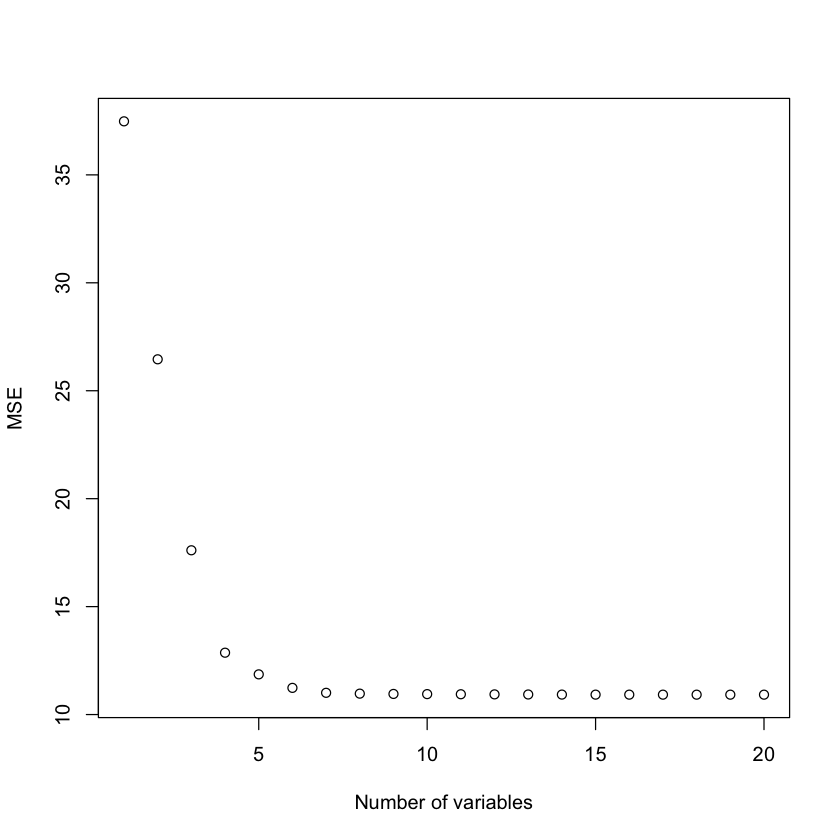

In [12]:
# WRITE YOUR CODE HERE

regfit.full = regsubsets(y~., data = test_set, nvmax = 20)

test_summary <- summary(regfit.full)

test_summary

#MSE = RSS / (sample size - (num of predictors + intercept)
plot((test_summary$rss/79), xlab = "Number of variables", ylab = "MSE")

#Need to identify the coefficient B for each of the 20 models identified in 
# regfit.full to find the test set MSE.

#First make a matrix with all test set data.
test_mat = model.matrix (y~., data = test_set)

#Define var val_errors, empaty vector of NAs. The MSEs will go in this column.
val_errors <- rep(NA,20)

for(i in 1:20){
  
  # Extract the vector of predictors in the best fit model on i predictors
  coefi = coef(regfit.full, id = i)
  
  # Make predictions using matrix multiplication of the test matirx and the coefficients vector
  pred = test_mat[,names(coefi)]%*%coefi
  
  # Calculate the MSE
  val_errors[i] = mean((test_set$y-pred)^2)
}

print(val_errors)

predict(lm(y~., data = training_set))

mse_training <- mean(training_set$y - predict(lm(y~., data = training_set))^2)

> *Write your response here* 
> 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
Marc Levesque